# Problem No.1

### importing the library

In [2]:
import numpy as np

### creating the input array

In [3]:
X = np.array([[0,0,0,0],[0,0,0,1],[0,0,1,0],[0,0,1,1],[0,1,0,0],[0,1,0,1],
              [0,1,1,0],[0,1,1,1],[1,0,0,0],[1,0,0,1],[1,0,1,0],[1,0,1,1],[1,1,0,0],[1,1,0,1],[1,1,1,0],[1,1,1,1]])

print ('\n Input:')
print(X)


 Input:
[[0 0 0 0]
 [0 0 0 1]
 [0 0 1 0]
 [0 0 1 1]
 [0 1 0 0]
 [0 1 0 1]
 [0 1 1 0]
 [0 1 1 1]
 [1 0 0 0]
 [1 0 0 1]
 [1 0 1 0]
 [1 0 1 1]
 [1 1 0 0]
 [1 1 0 1]
 [1 1 1 0]
 [1 1 1 1]]


#### creating the output array

In [4]:
y=np.array([[0],[1],[1],[0],[1],[0],[0],[1],[1],[0],[0],[1],[0],[1],[1],[0]]).T
print ('\n Actual Output:')
print(y)


 Actual Output:
[[0 1 1 0 1 0 0 1 1 0 0 1 0 1 1 0]]


### Initialization of weights and biases

In [5]:
inputneurons,hiddenlayerneurons,outputneurons=4,4,1
W1 = np.random.uniform(-1,1, size=(hiddenlayerneurons,inputneurons))
B1 = np.random.uniform(-1,1, size=(hiddenlayerneurons,1))
W2 = np.random.uniform(-1,1, size=(outputneurons,hiddenlayerneurons))
B2 = np.random.uniform(-1,1, size=(outputneurons,1)) 

#### defining the Sigmoid Function

In [6]:
def sigmoid (x):
    return 1/(1 + np.exp(-x))

### Training Model

In [7]:
def forwardpropogation(X,y,W1,B1,W2,B2):
     A1=np.dot(W1,X.T)+B1
     initial_output= sigmoid(A1)
     A2=np.dot(W2,initial_output)+B2
     predicted_output= sigmoid(A2)
     cache = (A1,initial_output,W1,B1, A2 ,predicted_output ,W2, B2)
     logprobs = np.multiply(np.log(predicted_output), y) + np.multiply(np.log(1 - predicted_output), (1 - y))
     cost = -np.sum(logprobs) / X.shape[1]
     return cost, cache, predicted_output
    

In [8]:
def backwardpropogation(X,Y,cache):
    (A1,initial_output , W1,B1, A2 , predicted_output ,W2, B2)=cache
    dZ2=predicted_output-y
    dW2=np.dot(dZ2,initial_output.T)/X.shape[1]
    dB2=np.sum(dZ2,axis=1 ,keepdims=True)/X.shape[1]
    
    dA1 = np.dot(W2.T, dZ2)
    dZ1 = np.multiply(dA1, initial_output * (1- initial_output))
    dW1 = np.dot(dZ1, X) / X.shape[1]
    dB1 = np.sum(dZ1, axis = 1, keepdims = True) / X.shape[1]
    
    gradients = {"dZ2": dZ2, "dW2": dW2, "dB2": dB2,
                 "dZ1": dZ1, "dW1": dW1, "dB1": dB1}
    return gradients
  
    

In [9]:
def updateParameters(W1,W2,B1,B2, gradients, learningRate):
    W1 =W1 - learningRate * gradients["dW1"]
    W2 =W2 - learningRate * gradients["dW2"]
    B1= B1 - learningRate * gradients["dB1"]
    B2 =B2 - learningRate * gradients["dB2"]
    return W1,W2,B1,B2

#### Plotting Learning curving and Evaluating

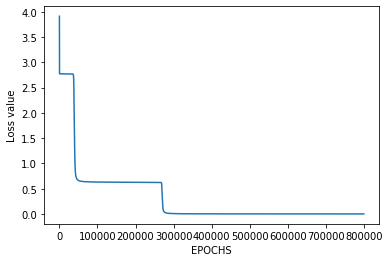

[[0.00004699 0.99983491 0.99987635 0.00003066 0.99983491 0.00053172
  0.00003065 0.99988567 0.9998763  0.00003062 0.00044338 0.99991766
  0.0000306  0.99988569 0.99991768 0.00002502]]


In [10]:
#plotting learning curve
from matplotlib import pyplot as plt
epoch = 800000
learningRate = 0.05
losses = np.zeros((epoch, 1))
  
for i in range(epoch):
    losses[i, 0], cache, A2 = forwardpropogation(X, y,W1,B1,W2,B2 )
    gradients = backwardpropogation(X, y, cache)
    W1,W2,B1,B2 = updateParameters(W1,W2,B1,B2, gradients, learningRate)
  
# Evaluating the performance
plt.figure()
plt.plot(losses)
plt.xlabel("EPOCHS")
plt.ylabel("Loss value")
plt.show()

cost, _,predicted_output = forwardpropogation(X, y, W1,B1,W2,B2)
np.set_printoptions(suppress=True)
print(predicted_output)

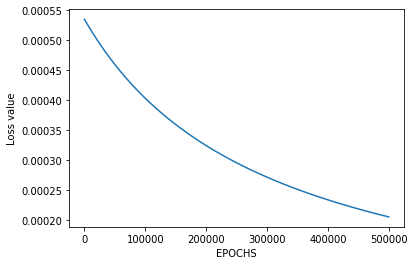

[[0.00002216 0.99994301 0.99994678 0.00001518 0.99994301 0.00017958
  0.00001518 0.99995884 0.99994677 0.00001517 0.00016894 0.9999629
  0.00001516 0.99995883 0.9999629  0.00001273]]


In [11]:
from matplotlib import pyplot as plt
epoch = 500000
learningRate = 0.1
losses = np.zeros((epoch, 1))
  
for i in range(epoch):
    losses[i, 0], cache, A2 = forwardpropogation(X, y,W1,B1,W2,B2 )
    gradients = backwardpropogation(X, y, cache)
    W1,W2,B1,B2 = updateParameters(W1,W2,B1,B2, gradients, learningRate)
  
# Evaluating the performance
plt.figure()
plt.plot(losses)
plt.xlabel("EPOCHS")
plt.ylabel("Loss value")
plt.show()

cost, _,predicted_output = forwardpropogation(X, y, W1,B1,W2,B2)
np.set_printoptions(suppress=True)
print(predicted_output)

In [ ]:
from matplotlib import pyplot as plt
epoch = 400000
learningRate = 0.15
losses = np.zeros((epoch, 1))
  
for i in range(epoch):
    losses[i, 0], cache, A2 = forwardpropogation(X, y,W1,B1,W2,B2 )
    gradients = backwardpropogation(X, y, cache)
    W1,W2,B1,B2 = updateParameters(W1,W2,B1,B2, gradients, learningRate)
  
# Evaluating the performance
plt.figure()
plt.plot(losses)
plt.xlabel("EPOCHS")
plt.ylabel("Loss value")
plt.show()

cost, _,predicted_output = forwardpropogation(X, y, W1,B1,W2,B2)
np.set_printoptions(suppress=True)
print(predicted_output)

In [ ]:
from matplotlib import pyplot as plt
epoch = 300000
learningRate = 0.20
losses = np.zeros((epoch, 1))
  
for i in range(epoch):
    losses[i, 0], cache, A2 = forwardpropogation(X, y,W1,B1,W2,B2 )
    gradients = backwardpropogation(X, y, cache)
    W1,W2,B1,B2 = updateParameters(W1,W2,B1,B2, gradients, learningRate)
  
# Evaluating the performance
plt.figure()
plt.plot(losses)
plt.xlabel("EPOCHS")
plt.ylabel("Loss value")
plt.show()

cost, _,predicted_output = forwardpropogation(X, y, W1,B1,W2,B2)
np.set_printoptions(suppress=True)
print(predicted_output)

In [ ]:
from matplotlib import pyplot as plt
epoch = 200000
learningRate = 0.25
losses = np.zeros((epoch, 1))
  
for i in range(epoch):
    losses[i, 0], cache, A2 = forwardpropogation(X, y,W1,B1,W2,B2 )
    gradients = backwardpropogation(X, y, cache)
    W1,W2,B1,B2 = updateParameters(W1,W2,B1,B2, gradients, learningRate)
  
# Evaluating the performance
plt.figure()
plt.plot(losses)
plt.xlabel("EPOCHS")
plt.ylabel("Loss value")
plt.show()

cost, _,predicted_output = forwardpropogation(X, y, W1,B1,W2,B2)
np.set_printoptions(suppress=True)
print(predicted_output)

In [ ]:
from matplotlib import pyplot as plt
epoch = 100000
learningRate = 0.3
losses = np.zeros((epoch, 1))
  
for i in range(epoch):
    losses[i, 0], cache, A2 = forwardpropogation(X, y,W1,B1,W2,B2 )
    gradients = backwardpropogation(X, y, cache)
    W1,W2,B1,B2 = updateParameters(W1,W2,B1,B2, gradients, learningRate)
  
# Evaluating the performance
plt.figure()
plt.plot(losses)
plt.xlabel("EPOCHS")
plt.ylabel("Loss value")
plt.show()

cost, _,predicted_output = forwardpropogation(X, y, W1,B1,W2,B2)
np.set_printoptions(suppress=True)
print(predicted_output)

In [ ]:
from matplotlib import pyplot as plt
epoch = 90000
learningRate = 0.35
losses = np.zeros((epoch, 1))
  
for i in range(epoch):
    losses[i, 0], cache, A2 = forwardpropogation(X, y,W1,B1,W2,B2 )
    gradients = backwardpropogation(X, y, cache)
    W1,W2,B1,B2 = updateParameters(W1,W2,B1,B2, gradients, learningRate)
  
# Evaluating the performance
plt.figure()
plt.plot(losses)
plt.xlabel("EPOCHS")
plt.ylabel("Loss value")
plt.show()

cost, _,predicted_output = forwardpropogation(X, y, W1,B1,W2,B2)
np.set_printoptions(suppress=True)
print(predicted_output)

In [ ]:
from matplotlib import pyplot as plt
epoch = 80000
learningRate = 0.4
losses = np.zeros((epoch, 1))
  
for i in range(epoch):
    losses[i, 0], cache, A2 = forwardpropogation(X, y,W1,B1,W2,B2 )
    gradients = backwardpropogation(X, y, cache)
    W1,W2,B1,B2 = updateParameters(W1,W2,B1,B2, gradients, learningRate)
  
# Evaluating the performance
plt.figure()
plt.plot(losses)
plt.xlabel("EPOCHS")
plt.ylabel("Loss value")
plt.show()

cost, _,predicted_output = forwardpropogation(X, y, W1,B1,W2,B2)
np.set_printoptions(suppress=True)
print(predicted_output)

In [ ]:
from matplotlib import pyplot as plt
epoch = 70000
learningRate = 0.45
losses = np.zeros((epoch, 1))
  
for i in range(epoch):
    losses[i, 0], cache, A2 = forwardpropogation(X, y,W1,B1,W2,B2 )
    gradients = backwardpropogation(X, y, cache)
    W1,W2,B1,B2 = updateParameters(W1,W2,B1,B2, gradients, learningRate)
  
# Evaluating the performance
plt.figure()
plt.plot(losses)
plt.xlabel("EPOCHS")
plt.ylabel("Loss value")
plt.show()

cost, _,predicted_output = forwardpropogation(X, y, W1,B1,W2,B2)
np.set_printoptions(suppress=True)
print(predicted_output)

In [ ]:
from matplotlib import pyplot as plt
epoch = 60000
learningRate = 0.5
losses = np.zeros((epoch, 1))
  
for i in range(epoch):
    losses[i, 0], cache, A2 = forwardpropogation(X, y,W1,B1,W2,B2 )
    gradients = backwardpropogation(X, y, cache)
    W1,W2,B1,B2 = updateParameters(W1,W2,B1,B2, gradients, learningRate)
  
# Evaluating the performance
plt.figure()
plt.plot(losses)
plt.xlabel("EPOCHS")
plt.ylabel("Loss value")
plt.show()

cost, _,predicted_output = forwardpropogation(X, y, W1,B1,W2,B2)
np.set_printoptions(suppress=True)
print(predicted_output)

### Adding a momentum term in the weight update with α = 0.9

In [ ]:
X = np.array([[0,0,0,0],[0,0,0,1],[0,0,1,0],[0,0,1,1],[0,1,0,0],[0,1,0,1],[0,1,1,0],[0,1,1,1],[1,0,0,0],[1,0,0,1],[1,0,1,0],[1,0,1,1],[1,1,0,0],[1,1,0,1],[1,1,1,0],[1,1,1,1]])
y = np.array([[0],[1],[1],[0],[1],[0],[0],[1],[1],[0],[0],[1],[0],[1],[1],[0]]).T

inputneurons,hiddenlayerneurons,outputneurons=4,4,1
W1 = np.random.uniform(-1,1, size=(hiddenlayerneurons,inputneurons))
B1 = np.random.uniform(-1,1, size=(hiddenlayerneurons,1))
W2 = np.random.uniform(-1,1, size=(outputneurons,hiddenlayerneurons))
B2 = np.random.uniform(-1,1, size=(outputneurons,1)) 

def sigmoid(z):
    return 1/(1 + np.exp(-z))
def sigmoid_derivative(z):
    return z*(1-z)

def forwardpropogation(X,y,W1,B1,W2,B2):
     A1=np.dot(W1,X.T)+B1
     initial_output= sigmoid(A1)
     A2=np.dot(W2,initial_output)+B2
     predicted_output= sigmoid(A2)
     cache = (A1,initial_output,W1,B1, A2 ,predicted_output ,W2, B2)
     logprobs = np.multiply(np.log(predicted_output), y) + np.multiply(np.log(1 - predicted_output), (1 - y))
     cost = -np.sum(logprobs) / X.shape[1]
     return cost, cache, predicted_output
    

def backwardpropogation(X,Y,cache):
    (A1,initial_output , W1,B1, A2 , predicted_output ,W2, B2)=cache
    dZ2=predicted_output-y
    dW2=(np.dot(dZ2,initial_output.T)/X.shape[1])
    dW2=  dW2 + 0.9*dW2
    dB2=np.sum(dZ2,axis=1 ,keepdims=True)/X.shape[1]
    
    dA1 = np.dot(W2.T, dZ2)
    dZ1 = np.multiply(dA1, initial_output * (1- initial_output))
    dW1 = (np.dot(dZ1, X) / X.shape[1]) 
    dW1=  dW1 + 0.9*dW1
    dB1 = np.sum(dZ1, axis = 1, keepdims = True) / X.shape[1]
    
    gradients = {"dZ2": dZ2, "dW2": dW2, "dB2": dB2,
                 "dZ1": dZ1, "dW1": dW1, "dB1": dB1}
    return gradients
  
    

def updateParameters(W1,W2,B1,B2, gradients, learningRate):
  
    W1 =W1 - learningRate * gradients["dW1"]
    W2 =W2 - learningRate * gradients["dW2"]
    B1= B1 - learningRate * gradients["dB1"]
    B2 =B2 - learningRate * gradients["dB2"]
    return W1,W2,B1,B2

from matplotlib import pyplot as plt
epoch = 100000
learningRate = 0.05
losses = np.zeros((epoch, 1))
  
for i in range(epoch):
    losses[i, 0], cache, A2 = forwardpropogation(X, y,W1,B1,W2,B2 )
    gradients = backwardpropogation(X, y, cache)
    W1,W2,B1,B2 = updateParameters(W1,W2,B1,B2, gradients, learningRate)
  
# Evaluating the performance
plt.figure()
plt.plot(losses)
plt.xlabel("EPOCHS")
plt.ylabel("Loss value")
p2 = plt.show()

cost, _,predicted_output = forwardpropogation(X, y, W1,B1,W2,B2)
np.set_printoptions(suppress=True)
print(predicted_output)

In [ ]:
import numpy as np
X = np.array([[0,0,0,0],[0,0,0,1],[0,0,1,0],[0,0,1,1],[0,1,0,0],[0,1,0,1],[0,1,1,0],[0,1,1,1],[1,0,0,0],[1,0,0,1],[1,0,1,0],[1,0,1,1],[1,1,0,0],[1,1,0,1],[1,1,1,0],[1,1,1,1]])
y = np.array([[0],[1],[1],[0],[1],[0],[0],[1],[1],[0],[0],[1],[0],[1],[1],[0]]).T

inputneurons,hiddenlayerneurons,outputneurons=4,4,1
W1 = np.random.uniform(-1,1, size=(hiddenlayerneurons,inputneurons))
B1 = np.random.uniform(-1,1, size=(hiddenlayerneurons,1))
W2 = np.random.uniform(-1,1, size=(outputneurons,hiddenlayerneurons))
B2 = np.random.uniform(-1,1, size=(outputneurons,1)) 

def sigmoid(z):
    return 1/(1 + np.exp(-z))
def sigmoid_derivative(z):
    return z*(1-z)

def forwardpropogation(X,y,W1,B1,W2,B2):
     A1=np.dot(W1,X.T)+B1
     initial_output= sigmoid(A1)
     A2=np.dot(W2,initial_output)+B2
     predicted_output= sigmoid(A2)
     cache = (A1,initial_output,W1,B1, A2 ,predicted_output ,W2, B2)
     logprobs = np.multiply(np.log(predicted_output), y) + np.multiply(np.log(1 - predicted_output), (1 - y))
     cost = -np.sum(logprobs) / X.shape[1]
     return cost, cache, predicted_output
    

def backwardpropogation(X,Y,cache):
    (A1,initial_output , W1,B1, A2 , predicted_output ,W2, B2)=cache
    dZ2=predicted_output-y
    dW2=(np.dot(dZ2,initial_output.T)/X.shape[1])
    dW2=  dW2 + 0.9*dW2
    dB2=np.sum(dZ2,axis=1 ,keepdims=True)/X.shape[1]
    
    dA1 = np.dot(W2.T, dZ2)
    dZ1 = np.multiply(dA1, initial_output * (1- initial_output))
    dW1 = (np.dot(dZ1, X) / X.shape[1]) 
    dW1=  dW1 + 0.9*dW1
    dB1 = np.sum(dZ1, axis = 1, keepdims = True) / X.shape[1]
    
    gradients = {"dZ2": dZ2, "dW2": dW2, "dB2": dB2,
                 "dZ1": dZ1, "dW1": dW1, "dB1": dB1}
    return gradients
  
    

def updateParameters(W1,W2,B1,B2, gradients, learningRate):
  
    W1 =W1 - learningRate * gradients["dW1"]
    W2 =W2 - learningRate * gradients["dW2"]
    B1= B1 - learningRate * gradients["dB1"]
    B2 =B2 - learningRate * gradients["dB2"]
    return W1,W2,B1,B2

from matplotlib import pyplot as plt
epoch = 90000
learningRate = 0.1
losses = np.zeros((epoch, 1))
  
for i in range(epoch):
    losses[i, 0], cache, A2 = forwardpropogation(X, y,W1,B1,W2,B2 )
    gradients = backwardpropogation(X, y, cache)
    W1,W2,B1,B2 = updateParameters(W1,W2,B1,B2, gradients, learningRate)
  
# Evaluating the performance
plt.figure()
plt.plot(losses)
plt.xlabel("EPOCHS")
plt.ylabel("Loss value")
p2 = plt.show()

cost, _,predicted_output = forwardpropogation(X, y, W1,B1,W2,B2)
np.set_printoptions(suppress=True)
print(predicted_output)

In [ ]:
import numpy as np
X = np.array([[0,0,0,0],[0,0,0,1],[0,0,1,0],[0,0,1,1],[0,1,0,0],[0,1,0,1],[0,1,1,0],[0,1,1,1],[1,0,0,0],[1,0,0,1],[1,0,1,0],[1,0,1,1],[1,1,0,0],[1,1,0,1],[1,1,1,0],[1,1,1,1]])
y = np.array([[0],[1],[1],[0],[1],[0],[0],[1],[1],[0],[0],[1],[0],[1],[1],[0]]).T

inputneurons,hiddenlayerneurons,outputneurons=4,4,1
W1 = np.random.uniform(-1,1, size=(hiddenlayerneurons,inputneurons))
B1 = np.random.uniform(-1,1, size=(hiddenlayerneurons,1))
W2 = np.random.uniform(-1,1, size=(outputneurons,hiddenlayerneurons))
B2 = np.random.uniform(-1,1, size=(outputneurons,1)) 

def sigmoid(z):
    return 1/(1 + np.exp(-z))
def sigmoid_derivative(z):
    return z*(1-z)

def forwardpropogation(X,y,W1,B1,W2,B2):
     A1=np.dot(W1,X.T)+B1
     initial_output= sigmoid(A1)
     A2=np.dot(W2,initial_output)+B2
     predicted_output= sigmoid(A2)
     cache = (A1,initial_output,W1,B1, A2 ,predicted_output ,W2, B2)
     logprobs = np.multiply(np.log(predicted_output), y) + np.multiply(np.log(1 - predicted_output), (1 - y))
     cost = -np.sum(logprobs) / X.shape[1]
     return cost, cache, predicted_output
    

def backwardpropogation(X,Y,cache):
    (A1,initial_output , W1,B1, A2 , predicted_output ,W2, B2)=cache
    dZ2=predicted_output-y
    dW2=(np.dot(dZ2,initial_output.T)/X.shape[1])
    dW2=  dW2 + 0.9*dW2
    dB2=np.sum(dZ2,axis=1 ,keepdims=True)/X.shape[1]
    
    dA1 = np.dot(W2.T, dZ2)
    dZ1 = np.multiply(dA1, initial_output * (1- initial_output))
    dW1 = (np.dot(dZ1, X) / X.shape[1]) 
    dW1=  dW1 + 0.9*dW1
    dB1 = np.sum(dZ1, axis = 1, keepdims = True) / X.shape[1]
    
    gradients = {"dZ2": dZ2, "dW2": dW2, "dB2": dB2,
                 "dZ1": dZ1, "dW1": dW1, "dB1": dB1}
    return gradients
  
    

def updateParameters(W1,W2,B1,B2, gradients, learningRate):
  
    W1 =W1 - learningRate * gradients["dW1"]
    W2 =W2 - learningRate * gradients["dW2"]
    B1= B1 - learningRate * gradients["dB1"]
    B2 =B2 - learningRate * gradients["dB2"]
    return W1,W2,B1,B2

from matplotlib import pyplot as plt
epoch = 86000
learningRate = 0.15
losses = np.zeros((epoch, 1))
  
for i in range(epoch):
    losses[i, 0], cache, A2 = forwardpropogation(X, y,W1,B1,W2,B2 )
    gradients = backwardpropogation(X, y, cache)
    W1,W2,B1,B2 = updateParameters(W1,W2,B1,B2, gradients, learningRate)
  
# Evaluating the performance
plt.figure()
plt.plot(losses)
plt.xlabel("EPOCHS")
plt.ylabel("Loss value")
p2 = plt.show()

cost, _,predicted_output = forwardpropogation(X, y, W1,B1,W2,B2)
np.set_printoptions(suppress=True)
print(predicted_output)

In [ ]:
import numpy as np
X = np.array([[0,0,0,0],[0,0,0,1],[0,0,1,0],[0,0,1,1],[0,1,0,0],[0,1,0,1],[0,1,1,0],[0,1,1,1],[1,0,0,0],[1,0,0,1],[1,0,1,0],[1,0,1,1],[1,1,0,0],[1,1,0,1],[1,1,1,0],[1,1,1,1]])
y = np.array([[0],[1],[1],[0],[1],[0],[0],[1],[1],[0],[0],[1],[0],[1],[1],[0]]).T

inputneurons,hiddenlayerneurons,outputneurons=4,4,1
W1 = np.random.uniform(-1,1, size=(hiddenlayerneurons,inputneurons))
B1 = np.random.uniform(-1,1, size=(hiddenlayerneurons,1))
W2 = np.random.uniform(-1,1, size=(outputneurons,hiddenlayerneurons))
B2 = np.random.uniform(-1,1, size=(outputneurons,1)) 

def sigmoid(z):
    return 1/(1 + np.exp(-z))
def sigmoid_derivative(z):
    return z*(1-z)

def forwardpropogation(X,y,W1,B1,W2,B2):
     A1=np.dot(W1,X.T)+B1
     initial_output= sigmoid(A1)
     A2=np.dot(W2,initial_output)+B2
     predicted_output= sigmoid(A2)
     cache = (A1,initial_output,W1,B1, A2 ,predicted_output ,W2, B2)
     logprobs = np.multiply(np.log(predicted_output), y) + np.multiply(np.log(1 - predicted_output), (1 - y))
     cost = -np.sum(logprobs) / X.shape[1]
     return cost, cache, predicted_output
    

def backwardpropogation(X,Y,cache):
    (A1,initial_output , W1,B1, A2 , predicted_output ,W2, B2)=cache
    dZ2=predicted_output-y
    dW2=(np.dot(dZ2,initial_output.T)/X.shape[1])
    dW2=  dW2 + 0.9*dW2
    dB2=np.sum(dZ2,axis=1 ,keepdims=True)/X.shape[1]
    
    dA1 = np.dot(W2.T, dZ2)
    dZ1 = np.multiply(dA1, initial_output * (1- initial_output))
    dW1 = (np.dot(dZ1, X) / X.shape[1]) 
    dW1=  dW1 + 0.9*dW1
    dB1 = np.sum(dZ1, axis = 1, keepdims = True) / X.shape[1]
    
    gradients = {"dZ2": dZ2, "dW2": dW2, "dB2": dB2,
                 "dZ1": dZ1, "dW1": dW1, "dB1": dB1}
    return gradients
  
    

def updateParameters(W1,W2,B1,B2, gradients, learningRate):
  
    W1 =W1 - learningRate * gradients["dW1"]
    W2 =W2 - learningRate * gradients["dW2"]
    B1= B1 - learningRate * gradients["dB1"]
    B2 =B2 - learningRate * gradients["dB2"]
    return W1,W2,B1,B2

from matplotlib import pyplot as plt
epoch = 70000
learningRate = 0.20
losses = np.zeros((epoch, 1))
  
for i in range(epoch):
    losses[i, 0], cache, A2 = forwardpropogation(X, y,W1,B1,W2,B2 )
    gradients = backwardpropogation(X, y, cache)
    W1,W2,B1,B2 = updateParameters(W1,W2,B1,B2, gradients, learningRate)
  
# Evaluating the performance
plt.figure()
plt.plot(losses)
plt.xlabel("EPOCHS")
plt.ylabel("Loss value")
p2 = plt.show()

cost, _,predicted_output = forwardpropogation(X, y, W1,B1,W2,B2)
np.set_printoptions(suppress=True)
print(predicted_output)

In [ ]:
import numpy as np
X = np.array([[0,0,0,0],[0,0,0,1],[0,0,1,0],[0,0,1,1],[0,1,0,0],[0,1,0,1],[0,1,1,0],[0,1,1,1],[1,0,0,0],[1,0,0,1],[1,0,1,0],[1,0,1,1],[1,1,0,0],[1,1,0,1],[1,1,1,0],[1,1,1,1]])
y = np.array([[0],[1],[1],[0],[1],[0],[0],[1],[1],[0],[0],[1],[0],[1],[1],[0]]).T

inputneurons,hiddenlayerneurons,outputneurons=4,4,1
W1 = np.random.uniform(-1,1, size=(hiddenlayerneurons,inputneurons))
B1 = np.random.uniform(-1,1, size=(hiddenlayerneurons,1))
W2 = np.random.uniform(-1,1, size=(outputneurons,hiddenlayerneurons))
B2 = np.random.uniform(-1,1, size=(outputneurons,1)) 

def sigmoid(z):
    return 1/(1 + np.exp(-z))
def sigmoid_derivative(z):
    return z*(1-z)

def forwardpropogation(X,y,W1,B1,W2,B2):
     A1=np.dot(W1,X.T)+B1
     initial_output= sigmoid(A1)
     A2=np.dot(W2,initial_output)+B2
     predicted_output= sigmoid(A2)
     cache = (A1,initial_output,W1,B1, A2 ,predicted_output ,W2, B2)
     logprobs = np.multiply(np.log(predicted_output), y) + np.multiply(np.log(1 - predicted_output), (1 - y))
     cost = -np.sum(logprobs) / X.shape[1]
     return cost, cache, predicted_output
    

def backwardpropogation(X,Y,cache):
    (A1,initial_output , W1,B1, A2 , predicted_output ,W2, B2)=cache
    dZ2=predicted_output-y
    dW2=(np.dot(dZ2,initial_output.T)/X.shape[1])
    dW2=  dW2 + 0.9*dW2
    dB2=np.sum(dZ2,axis=1 ,keepdims=True)/X.shape[1]
    
    dA1 = np.dot(W2.T, dZ2)
    dZ1 = np.multiply(dA1, initial_output * (1- initial_output))
    dW1 = (np.dot(dZ1, X) / X.shape[1]) 
    dW1=  dW1 + 0.9*dW1
    dB1 = np.sum(dZ1, axis = 1, keepdims = True) / X.shape[1]
    
    gradients = {"dZ2": dZ2, "dW2": dW2, "dB2": dB2,
                 "dZ1": dZ1, "dW1": dW1, "dB1": dB1}
    return gradients
  
    

def updateParameters(W1,W2,B1,B2, gradients, learningRate):
  
    W1 =W1 - learningRate * gradients["dW1"]
    W2 =W2 - learningRate * gradients["dW2"]
    B1= B1 - learningRate * gradients["dB1"]
    B2 =B2 - learningRate * gradients["dB2"]
    return W1,W2,B1,B2

from matplotlib import pyplot as plt
epoch = 60000
learningRate = 0.25
losses = np.zeros((epoch, 1))
  
for i in range(epoch):
    losses[i, 0], cache, A2 = forwardpropogation(X, y,W1,B1,W2,B2 )
    gradients = backwardpropogation(X, y, cache)
    W1,W2,B1,B2 = updateParameters(W1,W2,B1,B2, gradients, learningRate)
  
# Evaluating the performance
plt.figure()
plt.plot(losses)
plt.xlabel("EPOCHS")
plt.ylabel("Loss value")
p2 = plt.show()

cost, _,predicted_output = forwardpropogation(X, y, W1,B1,W2,B2)
np.set_printoptions(suppress=True)
print(predicted_output)

In [ ]:
import numpy as np
X = np.array([[0,0,0,0],[0,0,0,1],[0,0,1,0],[0,0,1,1],[0,1,0,0],[0,1,0,1],[0,1,1,0],[0,1,1,1],[1,0,0,0],[1,0,0,1],[1,0,1,0],[1,0,1,1],[1,1,0,0],[1,1,0,1],[1,1,1,0],[1,1,1,1]])
y = np.array([[0],[1],[1],[0],[1],[0],[0],[1],[1],[0],[0],[1],[0],[1],[1],[0]]).T

inputneurons,hiddenlayerneurons,outputneurons=4,4,1
W1 = np.random.uniform(-1,1, size=(hiddenlayerneurons,inputneurons))
B1 = np.random.uniform(-1,1, size=(hiddenlayerneurons,1))
W2 = np.random.uniform(-1,1, size=(outputneurons,hiddenlayerneurons))
B2 = np.random.uniform(-1,1, size=(outputneurons,1)) 

def sigmoid(z):
    return 1/(1 + np.exp(-z))
def sigmoid_derivative(z):
    return z*(1-z)

def forwardpropogation(X,y,W1,B1,W2,B2):
     A1=np.dot(W1,X.T)+B1
     initial_output= sigmoid(A1)
     A2=np.dot(W2,initial_output)+B2
     predicted_output= sigmoid(A2)
     cache = (A1,initial_output,W1,B1, A2 ,predicted_output ,W2, B2)
     logprobs = np.multiply(np.log(predicted_output), y) + np.multiply(np.log(1 - predicted_output), (1 - y))
     cost = -np.sum(logprobs) / X.shape[1]
     return cost, cache, predicted_output
    

def backwardpropogation(X,Y,cache):
    (A1,initial_output , W1,B1, A2 , predicted_output ,W2, B2)=cache
    dZ2=predicted_output-y
    dW2=(np.dot(dZ2,initial_output.T)/X.shape[1])
    dW2=  dW2 + 0.9*dW2
    dB2=np.sum(dZ2,axis=1 ,keepdims=True)/X.shape[1]
    
    dA1 = np.dot(W2.T, dZ2)
    dZ1 = np.multiply(dA1, initial_output * (1- initial_output))
    dW1 = (np.dot(dZ1, X) / X.shape[1]) 
    dW1=  dW1 + 0.9*dW1
    dB1 = np.sum(dZ1, axis = 1, keepdims = True) / X.shape[1]
    
    gradients = {"dZ2": dZ2, "dW2": dW2, "dB2": dB2,
                 "dZ1": dZ1, "dW1": dW1, "dB1": dB1}
    return gradients
  
    

def updateParameters(W1,W2,B1,B2, gradients, learningRate):
  
    W1 =W1 - learningRate * gradients["dW1"]
    W2 =W2 - learningRate * gradients["dW2"]
    B1= B1 - learningRate * gradients["dB1"]
    B2 =B2 - learningRate * gradients["dB2"]
    return W1,W2,B1,B2

from matplotlib import pyplot as plt
epoch = 68000
learningRate = 0.30
losses = np.zeros((epoch, 1))
  
for i in range(epoch):
    losses[i, 0], cache, A2 = forwardpropogation(X, y,W1,B1,W2,B2 )
    gradients = backwardpropogation(X, y, cache)
    W1,W2,B1,B2 = updateParameters(W1,W2,B1,B2, gradients, learningRate)
  
# Evaluating the performance
plt.figure()
plt.plot(losses)
plt.xlabel("EPOCHS")
plt.ylabel("Loss value")
p2 = plt.show()

cost, _,predicted_output = forwardpropogation(X, y, W1,B1,W2,B2)
np.set_printoptions(suppress=True)
print(predicted_output)

In [ ]:
import numpy as np
X = np.array([[0,0,0,0],[0,0,0,1],[0,0,1,0],[0,0,1,1],[0,1,0,0],[0,1,0,1],[0,1,1,0],[0,1,1,1],[1,0,0,0],[1,0,0,1],[1,0,1,0],[1,0,1,1],[1,1,0,0],[1,1,0,1],[1,1,1,0],[1,1,1,1]])
y = np.array([[0],[1],[1],[0],[1],[0],[0],[1],[1],[0],[0],[1],[0],[1],[1],[0]]).T

inputneurons,hiddenlayerneurons,outputneurons=4,4,1
W1 = np.random.uniform(-1,1, size=(hiddenlayerneurons,inputneurons))
B1 = np.random.uniform(-1,1, size=(hiddenlayerneurons,1))
W2 = np.random.uniform(-1,1, size=(outputneurons,hiddenlayerneurons))
B2 = np.random.uniform(-1,1, size=(outputneurons,1)) 

def sigmoid(z):
    return 1/(1 + np.exp(-z))
def sigmoid_derivative(z):
    return z*(1-z)

def forwardpropogation(X,y,W1,B1,W2,B2):
     A1=np.dot(W1,X.T)+B1
     initial_output= sigmoid(A1)
     A2=np.dot(W2,initial_output)+B2
     predicted_output= sigmoid(A2)
     cache = (A1,initial_output,W1,B1, A2 ,predicted_output ,W2, B2)
     logprobs = np.multiply(np.log(predicted_output), y) + np.multiply(np.log(1 - predicted_output), (1 - y))
     cost = -np.sum(logprobs) / X.shape[1]
     return cost, cache, predicted_output
    

def backwardpropogation(X,Y,cache):
    (A1,initial_output , W1,B1, A2 , predicted_output ,W2, B2)=cache
    dZ2=predicted_output-y
    dW2=(np.dot(dZ2,initial_output.T)/X.shape[1])
    dW2=  dW2 + 0.9*dW2
    dB2=np.sum(dZ2,axis=1 ,keepdims=True)/X.shape[1]
    
    dA1 = np.dot(W2.T, dZ2)
    dZ1 = np.multiply(dA1, initial_output * (1- initial_output))
    dW1 = (np.dot(dZ1, X) / X.shape[1]) 
    dW1=  dW1 + 0.9*dW1
    dB1 = np.sum(dZ1, axis = 1, keepdims = True) / X.shape[1]
    
    gradients = {"dZ2": dZ2, "dW2": dW2, "dB2": dB2,
                 "dZ1": dZ1, "dW1": dW1, "dB1": dB1}
    return gradients
  
    

def updateParameters(W1,W2,B1,B2, gradients, learningRate):
  
    W1 =W1 - learningRate * gradients["dW1"]
    W2 =W2 - learningRate * gradients["dW2"]
    B1= B1 - learningRate * gradients["dB1"]
    B2 =B2 - learningRate * gradients["dB2"]
    return W1,W2,B1,B2

from matplotlib import pyplot as plt
epoch = 66000
learningRate = 0.35
losses = np.zeros((epoch, 1))
  
for i in range(epoch):
    losses[i, 0], cache, A2 = forwardpropogation(X, y,W1,B1,W2,B2 )
    gradients = backwardpropogation(X, y, cache)
    W1,W2,B1,B2 = updateParameters(W1,W2,B1,B2, gradients, learningRate)
  
# Evaluating the performance
plt.figure()
plt.plot(losses)
plt.xlabel("EPOCHS")
plt.ylabel("Loss value")
p2 = plt.show()

cost, _,predicted_output = forwardpropogation(X, y, W1,B1,W2,B2)
np.set_printoptions(suppress=True)
print(predicted_output)

In [ ]:
import numpy as np
X = np.array([[0,0,0,0],[0,0,0,1],[0,0,1,0],[0,0,1,1],[0,1,0,0],[0,1,0,1],[0,1,1,0],[0,1,1,1],[1,0,0,0],[1,0,0,1],[1,0,1,0],[1,0,1,1],[1,1,0,0],[1,1,0,1],[1,1,1,0],[1,1,1,1]])
y = np.array([[0],[1],[1],[0],[1],[0],[0],[1],[1],[0],[0],[1],[0],[1],[1],[0]]).T

inputneurons,hiddenlayerneurons,outputneurons=4,4,1
W1 = np.random.uniform(-1,1, size=(hiddenlayerneurons,inputneurons))
B1 = np.random.uniform(-1,1, size=(hiddenlayerneurons,1))
W2 = np.random.uniform(-1,1, size=(outputneurons,hiddenlayerneurons))
B2 = np.random.uniform(-1,1, size=(outputneurons,1)) 

def sigmoid(z):
    return 1/(1 + np.exp(-z))
def sigmoid_derivative(z):
    return z*(1-z)

def forwardpropogation(X,y,W1,B1,W2,B2):
     A1=np.dot(W1,X.T)+B1
     initial_output= sigmoid(A1)
     A2=np.dot(W2,initial_output)+B2
     predicted_output= sigmoid(A2)
     cache = (A1,initial_output,W1,B1, A2 ,predicted_output ,W2, B2)
     logprobs = np.multiply(np.log(predicted_output), y) + np.multiply(np.log(1 - predicted_output), (1 - y))
     cost = -np.sum(logprobs) / X.shape[1]
     return cost, cache, predicted_output
    

def backwardpropogation(X,Y,cache):
    (A1,initial_output , W1,B1, A2 , predicted_output ,W2, B2)=cache
    dZ2=predicted_output-y
    dW2=(np.dot(dZ2,initial_output.T)/X.shape[1])
    dW2=  dW2 + 0.9*dW2
    dB2=np.sum(dZ2,axis=1 ,keepdims=True)/X.shape[1]
    
    dA1 = np.dot(W2.T, dZ2)
    dZ1 = np.multiply(dA1, initial_output * (1- initial_output))
    dW1 = (np.dot(dZ1, X) / X.shape[1]) 
    dW1=  dW1 + 0.9*dW1
    dB1 = np.sum(dZ1, axis = 1, keepdims = True) / X.shape[1]
    
    gradients = {"dZ2": dZ2, "dW2": dW2, "dB2": dB2,
                 "dZ1": dZ1, "dW1": dW1, "dB1": dB1}
    return gradients
  
    

def updateParameters(W1,W2,B1,B2, gradients, learningRate):
  
    W1 =W1 - learningRate * gradients["dW1"]
    W2 =W2 - learningRate * gradients["dW2"]
    B1= B1 - learningRate * gradients["dB1"]
    B2 =B2 - learningRate * gradients["dB2"]
    return W1,W2,B1,B2

from matplotlib import pyplot as plt
epoch = 40000
learningRate = 0.40
losses = np.zeros((epoch, 1))
  
for i in range(epoch):
    losses[i, 0], cache, A2 = forwardpropogation(X, y,W1,B1,W2,B2 )
    gradients = backwardpropogation(X, y, cache)
    W1,W2,B1,B2 = updateParameters(W1,W2,B1,B2, gradients, learningRate)
  
# Evaluating the performance
plt.figure()
plt.plot(losses)
plt.xlabel("EPOCHS")
plt.ylabel("Loss value")
p2 = plt.show()

cost, _,predicted_output = forwardpropogation(X, y, W1,B1,W2,B2)
np.set_printoptions(suppress=True)
print(predicted_output)

In [ ]:
import numpy as np
X = np.array([[0,0,0,0],[0,0,0,1],[0,0,1,0],[0,0,1,1],[0,1,0,0],[0,1,0,1],[0,1,1,0],[0,1,1,1],[1,0,0,0],[1,0,0,1],[1,0,1,0],[1,0,1,1],[1,1,0,0],[1,1,0,1],[1,1,1,0],[1,1,1,1]])
y = np.array([[0],[1],[1],[0],[1],[0],[0],[1],[1],[0],[0],[1],[0],[1],[1],[0]]).T

inputneurons,hiddenlayerneurons,outputneurons=4,4,1
W1 = np.random.uniform(-1,1, size=(hiddenlayerneurons,inputneurons))
B1 = np.random.uniform(-1,1, size=(hiddenlayerneurons,1))
W2 = np.random.uniform(-1,1, size=(outputneurons,hiddenlayerneurons))
B2 = np.random.uniform(-1,1, size=(outputneurons,1)) 

def sigmoid(z):
    return 1/(1 + np.exp(-z))
def sigmoid_derivative(z):
    return z*(1-z)

def forwardpropogation(X,y,W1,B1,W2,B2):
     A1=np.dot(W1,X.T)+B1
     initial_output= sigmoid(A1)
     A2=np.dot(W2,initial_output)+B2
     predicted_output= sigmoid(A2)
     cache = (A1,initial_output,W1,B1, A2 ,predicted_output ,W2, B2)
     logprobs = np.multiply(np.log(predicted_output), y) + np.multiply(np.log(1 - predicted_output), (1 - y))
     cost = -np.sum(logprobs) / X.shape[1]
     return cost, cache, predicted_output
    

def backwardpropogation(X,Y,cache):
    (A1,initial_output , W1,B1, A2 , predicted_output ,W2, B2)=cache
    dZ2=predicted_output-y
    dW2=(np.dot(dZ2,initial_output.T)/X.shape[1])
    dW2=  dW2 + 0.9*dW2
    dB2=np.sum(dZ2,axis=1 ,keepdims=True)/X.shape[1]
    
    dA1 = np.dot(W2.T, dZ2)
    dZ1 = np.multiply(dA1, initial_output * (1- initial_output))
    dW1 = (np.dot(dZ1, X) / X.shape[1]) 
    dW1=  dW1 + 0.9*dW1
    dB1 = np.sum(dZ1, axis = 1, keepdims = True) / X.shape[1]
    
    gradients = {"dZ2": dZ2, "dW2": dW2, "dB2": dB2,
                 "dZ1": dZ1, "dW1": dW1, "dB1": dB1}
    return gradients
  
    

def updateParameters(W1,W2,B1,B2, gradients, learningRate):
  
    W1 =W1 - learningRate * gradients["dW1"]
    W2 =W2 - learningRate * gradients["dW2"]
    B1= B1 - learningRate * gradients["dB1"]
    B2 =B2 - learningRate * gradients["dB2"]
    return W1,W2,B1,B2

from matplotlib import pyplot as plt
epoch = 30000
learningRate = 0.45
losses = np.zeros((epoch, 1))
  
for i in range(epoch):
    losses[i, 0], cache, A2 = forwardpropogation(X, y,W1,B1,W2,B2 )
    gradients = backwardpropogation(X, y, cache)
    W1,W2,B1,B2 = updateParameters(W1,W2,B1,B2, gradients, learningRate)
  
# Evaluating the performance
plt.figure()
plt.plot(losses)
plt.xlabel("EPOCHS")
plt.ylabel("Loss value")
p2 = plt.show()

cost, _,predicted_output = forwardpropogation(X, y, W1,B1,W2,B2)
np.set_printoptions(suppress=True)
print(predicted_output)

In [ ]:
import numpy as np
X = np.array([[0,0,0,0],[0,0,0,1],[0,0,1,0],[0,0,1,1],[0,1,0,0],[0,1,0,1],[0,1,1,0],[0,1,1,1],[1,0,0,0],[1,0,0,1],[1,0,1,0],[1,0,1,1],[1,1,0,0],[1,1,0,1],[1,1,1,0],[1,1,1,1]])
y = np.array([[0],[1],[1],[0],[1],[0],[0],[1],[1],[0],[0],[1],[0],[1],[1],[0]]).T

inputneurons,hiddenlayerneurons,outputneurons=4,4,1
W1 = np.random.uniform(-1,1, size=(hiddenlayerneurons,inputneurons))
B1 = np.random.uniform(-1,1, size=(hiddenlayerneurons,1))
W2 = np.random.uniform(-1,1, size=(outputneurons,hiddenlayerneurons))
B2 = np.random.uniform(-1,1, size=(outputneurons,1)) 

def sigmoid(z):
    return 1/(1 + np.exp(-z))
def sigmoid_derivative(z):
    return z*(1-z)

def forwardpropogation(X,y,W1,B1,W2,B2):
     A1=np.dot(W1,X.T)+B1
     initial_output= sigmoid(A1)
     A2=np.dot(W2,initial_output)+B2
     predicted_output= sigmoid(A2)
     cache = (A1,initial_output,W1,B1, A2 ,predicted_output ,W2, B2)
     logprobs = np.multiply(np.log(predicted_output), y) + np.multiply(np.log(1 - predicted_output), (1 - y))
     cost = -np.sum(logprobs) / X.shape[1]
     return cost, cache, predicted_output
    

def backwardpropogation(X,Y,cache):
    (A1,initial_output , W1,B1, A2 , predicted_output ,W2, B2)=cache
    dZ2=predicted_output-y
    dW2=(np.dot(dZ2,initial_output.T)/X.shape[1])
    dW2=  dW2 + 0.9*dW2
    dB2=np.sum(dZ2,axis=1 ,keepdims=True)/X.shape[1]
    
    dA1 = np.dot(W2.T, dZ2)
    dZ1 = np.multiply(dA1, initial_output * (1- initial_output))
    dW1 = (np.dot(dZ1, X) / X.shape[1]) 
    dW1=  dW1 + 0.9*dW1
    dB1 = np.sum(dZ1, axis = 1, keepdims = True) / X.shape[1]
    
    gradients = {"dZ2": dZ2, "dW2": dW2, "dB2": dB2,
                 "dZ1": dZ1, "dW1": dW1, "dB1": dB1}
    return gradients
  
    

def updateParameters(W1,W2,B1,B2, gradients, learningRate):
  
    W1 =W1 - learningRate * gradients["dW1"]
    W2 =W2 - learningRate * gradients["dW2"]
    B1= B1 - learningRate * gradients["dB1"]
    B2 =B2 - learningRate * gradients["dB2"]
    return W1,W2,B1,B2

from matplotlib import pyplot as plt
epoch = 25000
learningRate = 0.50
losses = np.zeros((epoch, 1))
  
for i in range(epoch):
    losses[i, 0], cache, A2 = forwardpropogation(X, y,W1,B1,W2,B2 )
    gradients = backwardpropogation(X, y, cache)
    W1,W2,B1,B2 = updateParameters(W1,W2,B1,B2, gradients, learningRate)
  
# Evaluating the performance
plt.figure()
plt.plot(losses)
plt.xlabel("EPOCHS")
plt.ylabel("Loss value")
p2 = plt.show()

cost, _,predicted_output = forwardpropogation(X, y, W1,B1,W2,B2)
np.set_printoptions(suppress=True)
print(predicted_output)